# <font size="5">Projeto 8 de camadas</font>
Mariana Albuquerque e Henrique Rocha

In [58]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.io import wavfile
from scipy import signal, fft
from suaBibSignal import signalMeu
sinal = signalMeu()

# <font size="5">Modulação</font>

In [59]:
# print("Aguarde antes de começar a falar. A gravação terá uma duração de 5 segundos.")
# duration = 5  # segundos
# samplerate = 44100
# audio = sd.rec(int(samplerate * duration), samplerate=samplerate, channels=1, dtype=np.int16)
# sd.wait()
# wavfile.write('gravacao.wav', samplerate, audio)

In [60]:


# Abrir o arquivo de áudio corretamente
yAudio, samplerate = sf.read('gravacao.wav')
max_amplitude = np.max(np.abs(yAudio))
yAudioNormalizado = yAudio / max_amplitude
wavfile.write('audio_normalizado.wav', samplerate, np.array(yAudioNormalizado))
print("Áudio carregado. Agora aplicaremos um filtro.")

Áudio carregado. Agora aplicaremos um filtro.


In [61]:
#Filtro feito no Matlab
def filtrar(signal):
    a = 0.002988
    b = 0.002834
    c = 1
    d = -1.847
    e = 0.8532
    Ylist = []
    Ylist.append(signal[0])
    Ylist.append(signal[1])
    for i in range(2, len(signal)):
        H = -d * Ylist[i - 1] - e * Ylist[i - 2] + a * signal[i - 1] + b * signal[i - 2]
        Ylist.append(H)
    return Ylist

In [62]:
yFiltrado = filtrar(yAudioNormalizado)
# Salvar áudio filtrado
wavfile.write('audio_filtrado.wav', samplerate, np.array(yFiltrado))

# Modulação em Amplitude (AM)
portadora_freq = 14000.0
portadora = np.sin(2 * np.pi * portadora_freq * np.arange(len(yFiltrado)) / samplerate)
sinal_modulado = yFiltrado * portadora

# Salvar áudio modulado
wavfile.write('audio_modulado.wav', samplerate, np.array(sinal_modulado))
# Reproduzir o áudio modulado
audio_modulado, _ = sf.read('audio_modulado.wav')
sd.play(audio_modulado, samplerate)



In [63]:

# Normalizar o sinal modulado
max_amplitude = np.max(np.abs(sinal_modulado))
sinal_modulado_normalizado = sinal_modulado / max_amplitude

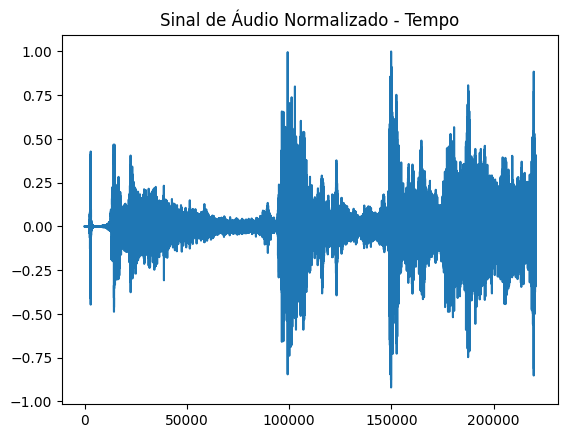

In [64]:
# Gráfico 1: Sinal de áudio original normalizado – domínio do tempo
plt.figure()
plt.plot(yAudioNormalizado)
plt.title('Sinal de Áudio Normalizado - Tempo')
plt.show()

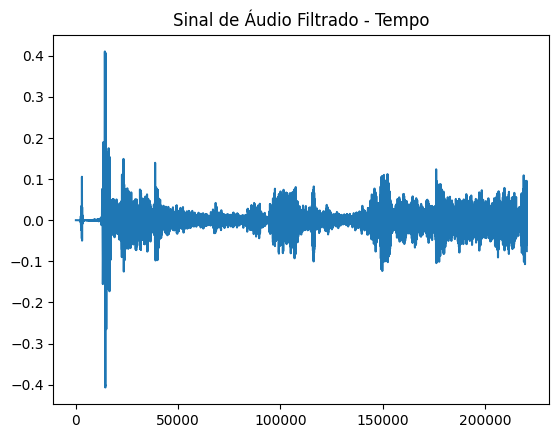

In [65]:
# Gráfico 2: Sinal de áudio filtrado – domínio do tempo
plt.figure()
plt.plot(yFiltrado)
plt.title('Sinal de Áudio Filtrado - Tempo')
plt.show()



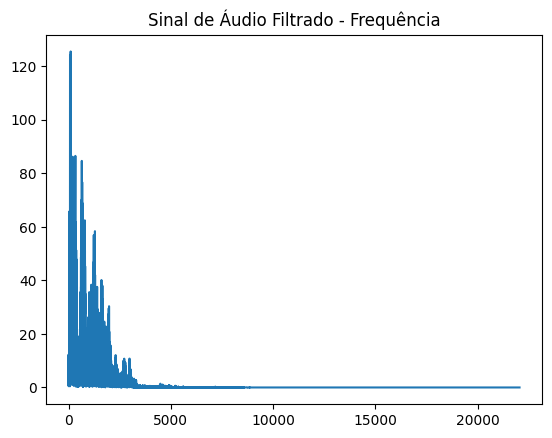

In [66]:
# Gráfico 3: Sinal de áudio filtrado – domínio da frequência (Fourier)
sinal.plotFFT(yFiltrado, samplerate)
plt.title('Sinal de Áudio Filtrado - Frequência')
plt.show()



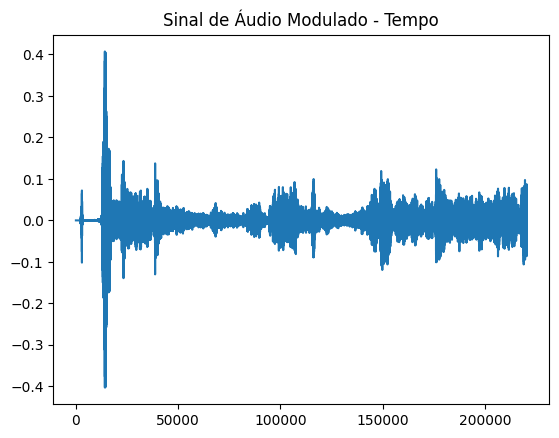

In [67]:
# Gráfico 4: Sinal de áudio modulado – domínio do tempo
plt.figure()
plt.plot(sinal_modulado)
plt.title('Sinal de Áudio Modulado - Tempo')
plt.show()



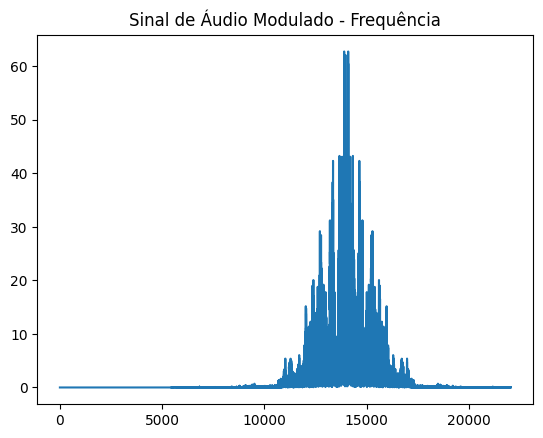

In [68]:
# Gráfico 5: Sinal de áudio modulado – domínio da frequência
sinal.plotFFT(sinal_modulado, samplerate)
plt.title('Sinal de Áudio Modulado - Frequência')
plt.show()

<font size = "5">Demodulação<font>

In [69]:
audio_modulado, _ = sf.read('audio_modulado.wav')
#normalizar o sinal modulado
# Normalizar o sinal modulado
audio_modulado_normalizado = audio_modulado

# 9. Demodule o áudio enviado no segundo computador (receptor).

portadora = np.sin(2 * np.pi * 14000 * np.arange(len(audio_modulado_normalizado)) / samplerate)
sinal_demodulado = audio_modulado_normalizado * portadora

# 10. Filtre as frequências superiores a 4kHz.
sinal_demodulado_filtrado = filtrar(sinal_demodulado)
sd.play(sinal_demodulado_filtrado, samplerate)

# 11. Execute o áudio do sinal demodulado e verifique que novamente é audível.
wavfile.write('audio_demodulado_filtrado.wav', samplerate, np.array(sinal_demodulado_filtrado))
audio_demodulado_filtrado, _ = sf.read('audio_demodulado_filtrado.wav')

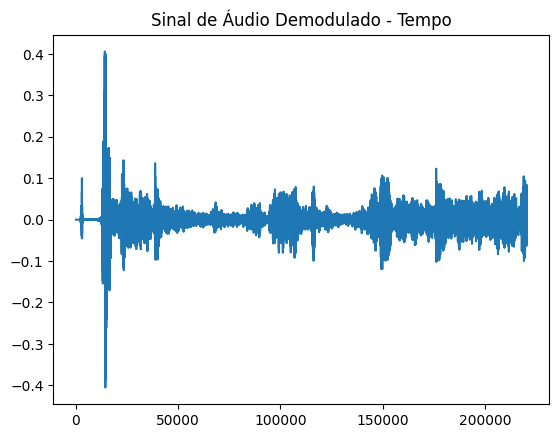

In [70]:
# 12. Gráfico 6: Sinal de áudio demodulado – domínio do tempo.
plt.figure()
plt.plot(sinal_demodulado)
plt.title('Sinal de Áudio Demodulado - Tempo')
plt.show()


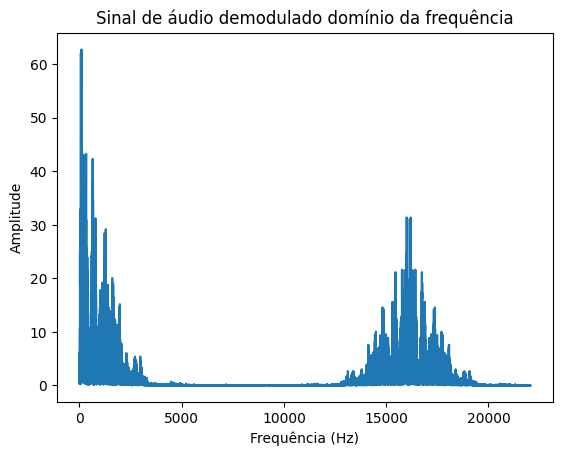

In [72]:
# 13. Gráfico 7: Sinal de áudio demodulado – domínio da frequência.
sinal.plotFFT(sinal_demodulado, samplerate)
plt.title('Sinal de áudio demodulado domínio da frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.show()



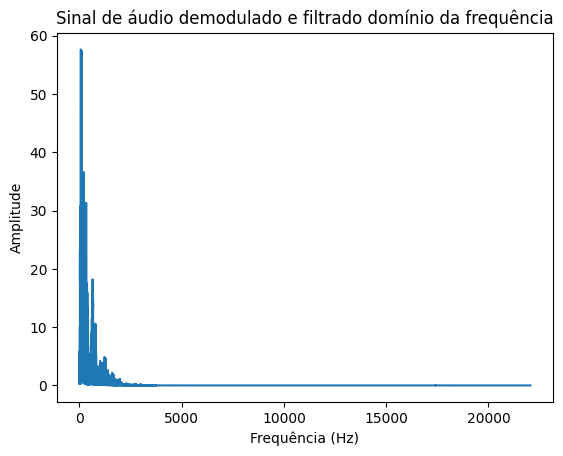

In [73]:
# 14. Gráfico 8: Sinal de áudio demodulado e filtrado – domínio da frequência.

sinal.plotFFT(sinal_demodulado_filtrado, samplerate)
plt.title('Sinal de áudio demodulado e filtrado domínio da frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.show()

